## Assignment
Now that you know how to build single-layer networks and train them, you will need to explore <br>training them on
some existing data sets, and evaluating their performance.
1. Utilize the methods learned in the tutorial above to train a good single layer network for the Iris data set (>95%
accuracy).
https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt
<br><ul>Be sure to generate a plot of the training history that shows improvement in the <br>validation accuracy (starts
low and grows high), and also evaluate() the performance on the complete data set as shown <br>above
demonstrating that the trained model is performing above the desired threshold.
<br><br>
2. Utilize the methods learned in the above tutorial to train a good single-layer classifier (>90% accuracy) for the
Wisconsin (Diagnostic) Breast Cancer data set. 
https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.
<br><ul>*This data set consists of 30 measured patient features, and integer classification labels (0,1)<br> 
    corresponding to either benign or malignant tumors. You will need to examine the data set as we did with<br>
    the Iris data above to construct the input/target feature vectors for this task.</ul>
<br><ul>*Finally, be sure to generate a plot of the training history showing clear signs of learning behavior<br>
(improvement in accuracy on the validation set) and evaluate() the overall data set performance<br>
demonstrating that the trained model is performing above the desired threshold.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras as keras

### Iris Data
---

#### -Prepping data-

In [2]:
data = np.array(pd.read_table(
"https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
delim_whitespace=True,
header=None))

In [3]:
print(data.shape)

(150, 5)


In [4]:
labels = data[:,4]
print(labels)

[1. 2. 2. 1. 0. 1. 1. 0. 1. 2. 2. 2. 1. 0. 0. 1. 1. 2. 0. 0. 1. 2. 2. 0.
 0. 2. 2. 0. 0. 1. 0. 0. 0. 1. 1. 2. 2. 2. 2. 1. 1. 0. 1. 0. 1. 1. 0. 2.
 2. 1. 1. 2. 0. 2. 1. 0. 2. 1. 2. 1. 0. 0. 0. 1. 0. 2. 2. 0. 0. 0. 2. 2.
 2. 1. 0. 2. 1. 2. 2. 2. 1. 2. 1. 0. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 1. 0.
 1. 0. 0. 2. 0. 0. 0. 0. 1. 2. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 2. 2. 1. 2.
 0. 1. 1. 2. 1. 2. 0. 1. 1. 2. 2. 0. 0. 1. 2. 2. 1. 0. 0. 2. 0. 0. 1. 1.
 1. 0. 2. 2. 2. 1.]


In [5]:
labels.shape

(150,)

In [6]:
X = data[:,0:4]

In [7]:
Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

#### -Building model-

In [26]:
# Initialize model type feed forward
model = keras.Sequential()

In [27]:
# Set intial weights for the network
input_size = X.shape[1]
output_size = Y.shape[1]

model.add(keras.layers.Dense(output_size,
         activation='sigmoid',
         input_shape=[input_size]))

# Specify loss function and method with which to optimize it
model.compile(loss = keras.losses.mse, 
              optimizer = keras.optimizers.SGD(lr=0.07), 
              metrics = ['accuracy'])

In [28]:
# Set basic training parameters
batch_size = 16
epochs = 1500
validation_split = 0.5

# Train the model and record the training
# history for later examination

history = model.fit(X, Y, 
                   batch_size = batch_size,
                   epochs = epochs, 
                   verbose = 0, 
                   validation_split = validation_split)

#### -Performance evaluation-

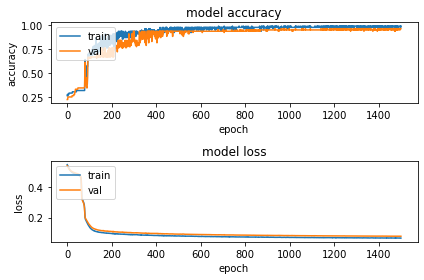

In [29]:
plt.figure(1)

# Summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') 

# Summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
-
plt.tight_layout()
plt.show() 

In [30]:
# Assessment of performance
score = model.evaluate(X, Y, verbose = 0)
print('Test loss:    ', score[0])
print('Test accuracy:', score[1])

Test loss:     0.07216458767652512
Test accuracy: 0.9733333587646484


### Cancer Data 
---

#### -Prepping data-

In [46]:
data = np.array(pd.read_table(
"https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt",
delim_whitespace=True,
header=None))

In [47]:
data.shape

(568, 31)

In [48]:
X = data[:,0:30]

In [49]:
labels = data[:,30]

Y = keras.utils.to_categorical(labels, 
                              len(np.unique(labels)))

#### -Building model- 

In [65]:
model = keras.Sequential()

In [66]:
input_size = X.shape[1]
output_size = Y.shape[1]

model.add(keras.layers.Dense(output_size,
                            activation='sigmoid',
                            input_shape=[input_size]))

model.compile(loss = keras.losses.mse,
             optimizer = keras.optimizers.SGD(lr = 0.07),
             metrics=['accuracy'])

In [67]:
# Setting parameters
batch_size = 16
epochs = 1000
validation_split = 0.5

history = model.fit(X, Y,
                   batch_size = batch_size,
                   epochs = epochs,
                   validation_split = validation_split,
                   verbose = 0)

#### -Performance evaluation-

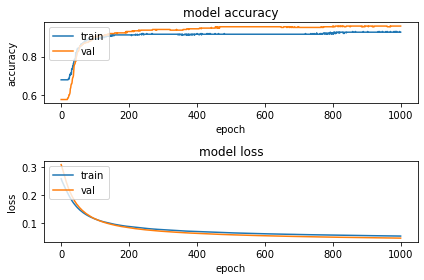

In [68]:
plt.figure(1)

# Summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') 

# Summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show() 

In [69]:
# Assessment of performance
score = model.evaluate(X, Y, verbose = 0)
print('Test loss:    ', score[0])
print('Test accuracy:', score[1])

Test loss:     0.05012140050530434
Test accuracy: 0.9436619877815247
